

# LASSO-, Ridge-, ElasticNet-—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ –∏—Ö –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### –†–µ–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—ã–µ –∫–ª–∞—Å—Å—ã —Å –ø—Ä–æ—à–ª–æ–≥–æ —Å–µ–º–∏–Ω–∞—Ä–∞:


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
def linear_expression(x):
    return 5 * x + 6

In [ ]:
objects_num = 50
X = np.linspace(-5, 5, objects_num)
y = linear_expression(X) + np.random.randn(objects_num) * 5

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

In [ ]:
class MyLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        # –ü—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ X, y –∏ –≤—ã—á–∏—Å–ª—è–µ—Ç –≤–µ—Å–∞ –ø–æ –¥–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
        # –ù–µ –∑–∞–±—É–¥—å—Ç–µ –ø—Ä–æ —Ñ–∏–∫—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ —Ä–∞–≤–Ω—ã–π 1

        n, k = X.shape

        X_train = X
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y

        return self

    def predict(self, X):
        # –ü—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ X –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –æ—Ç–≤–µ—Ç—ã –º–æ–¥–µ–ª–∏
        # –ù–µ –∑–∞–±—É–¥—å—Ç–µ –ø—Ä–æ —Ñ–∏–∫—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ —Ä–∞–≤–Ω—ã–π 1
        n, k = X.shape
        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        y_pred = X_train @ self.w

        return y_pred

    def get_weights(self):
        return self.w

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
class MyGradientLinearRegression(MyLinearRegression):
    def __init__(self, **kwargs):
        super().__init__(**kwargs) # –ø–µ—Ä–µ–¥–∞–µ—Ç –∏–º–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–æ–¥–∏—Ç–µ–ª—å—Å–∫–æ–º—É –∫–æ–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä—É
        self.w = None

    def fit(self, X, y, lr=0.01, max_iter=100):
        # –ü—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ X, y –∏ –≤—ã—á–∏—Å–ª—è–µ—Ç –≤–µ—Å–∞ –ø–æ –¥–∞–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
        # –ù–µ –∑–∞–±—É–¥—å—Ç–µ –ø—Ä–æ —Ñ–∏–∫—Ç–∏–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ —Ä–∞–≤–Ω—ã–π 1!

        n, k = X.shape

        # —Å–ª—É—á–∞–π–Ω–æ –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –≤–µ—Å–∞
        if self.w is None:
            self.w = np.random.randn(k + 1 if self.fit_intercept else k)

        X_train = np.hstack((X, np.ones((n, 1)))) if self.fit_intercept else X

        self.losses = []

        for iter_num in range(max_iter):
            y_pred = self.predict(X)
            self.losses.append(mean_squared_error(y_pred, y))

            grad = self._calc_gradient(X_train, y, y_pred)

            assert grad.shape == self.w.shape, f"gradient shape {grad.shape} is not equal weight shape {self.w.shape}"
            self.w -= lr * grad

        return self

    def _calc_gradient(self, X, y, y_pred):
        grad = 2 * (y_pred - y)[:, np.newaxis] * X
        grad = grad.mean(axis=0)
        return grad

    def get_losses(self):
        return self.losses

In [ ]:
class MySGDLinearRegression(MyGradientLinearRegression):
    def __init__(self, n_sample=10, **kwargs):
        super().__init__(**kwargs) # –ø–µ—Ä–µ–¥–∞–µ—Ç –∏–º–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–æ–¥–∏—Ç–µ–ª—å—Å–∫–æ–º—É –∫–æ–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä—É
        self.w = None
        self.n_sample = n_sample

    def _calc_gradient(self, X, y, y_pred):
        # –ì–ª–∞–≤–Ω–æ–µ –æ—Ç–ª–∏—á–∏–µ –≤ SGD -- —ç—Ç–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø–æ–¥–≤—ã–±–æ—Ä–∫–∏ –¥–ª—è —à–∞–≥–∞ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)

        grad = 2 * (y_pred[inds] - y[inds])[:, np.newaxis] * X[inds]
        grad = grad.mean(axis=0)

        return grad

# 1. –û —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏

–û–±—ã—á–Ω–æ –º–æ–¥–µ–ª–∏ –æ–±—É—á–∞—é—Ç—Å—è –Ω–∞ –∫–∞–∫–∏—Ö-—Ç–æ –∑–∞—à—É–º–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –í–µ—Å–∞ –º–æ–¥–µ–ª–µ–π –ø–æ—Å–ª–µ –æ–±—É—á–µ–Ω–∏—è –ø–æ–¥–±–∏—Ä–∞—é—Ç—Å—è –¥–ª—è —É–º–µ–Ω—å—à–µ–Ω–∏—è –æ—à–∏–±–∫–∏ —Ü–µ–ª–µ–≤–æ–π —Ñ—É–Ω–∫—Ü–∏–∏. **–ù–∞ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö –≤—ã–±–æ—Ä–∫–∞—Ö –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç –æ–±—É—á–∞—Ç—å—Å—è –ø–æ-—Ä–∞–∑–Ω–æ–º—É, –Ω–æ –Ω–∞–º –±—ã —Ö–æ—Ç–µ–ª–æ—Å—å –≤—ã—á–ª–µ–Ω—è—Ç—å –æ—Å–Ω–æ–≤–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ**, —Ç–æ –µ—Å—Ç—å **–Ω–µ –ø–µ—Ä–µ–æ–±—É—á–∞—Ç—å—Å—è (overfit)** –Ω–∞ –¥–∞–Ω–Ω—ã—Ö. –ò–Ω–∞—á–µ –æ–±—É—á–∏–≤—à–∏—Å—å –Ω–∞ –æ–¥–Ω–æ–º —Å–µ—Ç–µ, –º—ã –º–æ–∂–µ–º –ø–æ–ª—É—á–∞—Ç—å –Ω–µ–æ–∂–∏–¥–∞–Ω–Ω—ã–π –∏ –æ—á–µ–Ω—å –Ω–µ–ø—Ä–∏—è—Ç–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞ –¥—Ä—É–≥–∏—Ö –¥–∞–Ω–Ω—ã—Ö.

–¢–æ –µ—Å—Ç—å –º—ã —Ö–æ—Ç–µ–ª–∏ –±—ã —à—Ç—Ä–∞—Ñ–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å –∑–∞ –ø–æ–∏—Å–∫ —Å–ª–∏—à–∫–æ–º —Å–ª–æ–∂–Ω—ã—Ö —Å–≤—è–∑–µ–π, —á—Ç–æ–±—ã –≤—ã–∏—Å–∫–∏–≤–∞—Ç—å –±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç—ã–µ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏.


–ï—â–µ –æ–¥–Ω–æ–π –ø—Ä–æ–±–ª–µ–º–æ–π, —Å–ø–µ—Ü–∏—Ñ–∏—á–Ω–æ–π –¥–ª—è –ª–∏–Ω–µ–π–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π, —è–≤–ª—è–µ—Ç—Å—è **–º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç—å**. –û—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—å –º—É–ª—å—Ç–∏–∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω–æ—Å—Ç–∏ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ —Ä–µ—à–µ–Ω–∏–π —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ –º–Ω–æ–≥–æ, –≤–µ—Å–∞ –º–æ–¥–µ–ª–∏ –º–æ–≥—É—Ç –ø—Ä–∏–Ω–∏–º–∞—Ç—å –æ—á–µ–Ω—å –±–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è, –ø—Ä–∏ —ç—Ç–æ–º –º–æ–¥–µ–ª—å –º–æ–∂–µ—Ç –±—ã—Ç—å —Ç–∞–∫–∂–µ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–∞ –∫ –º–µ–ª–∫–∏–º –∏–∑–º–µ–Ω–µ–Ω–∏—è–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–∑-–∑–∞ —ç—Ç–æ–≥–æ, –ø–æ—ç—Ç–æ–º—É **–Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –∫–∞–∫–∏–º-—Ç–æ –æ–±—Ä–∞–∑–æ–º –æ–≥—Ä–∞–Ω–∏—á–∏—Ç—å –≤–µ–ª–∏—á–∏–Ω—É –≤–µ—Å–æ–≤ –º–æ–¥–µ–ª–∏**.

–î–ª—è –ª–∏–Ω–µ–π–Ω–æ–π –º–æ–¥–µ–ª–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏—è –Ω–∞ –≤–µ—Å–∞ –≤—ã–ø–æ–ª–Ω—è—é—Ç —Ä–æ–ª—å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏. –†–∞–∑–ª–∏—á–∞—é—Ç:
- $L_1$-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é (LASSO, least absolute shrinkage and selection operator), —É—á–∏—Ç—ã–≤–∞–Ω–∏–µ $||w||_1$;
- $L_2$-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é (Ridge), —É—á–∏—Ç—ã–≤–∞–Ω–∏–µ $||w||^2_2$;
- Elastic Net - –∫–æ–º–±–∏–Ω–∞—Ü–∏—è –¥–≤—É—Ö –ø—Ä–µ–¥—ã–¥—É—â–∏—Ö (—É—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –æ–±–µ –Ω–æ—Ä–º—ã –≤–µ—Å–æ–≤).

# 2. Ridge-—Ä–µ–≥—Ä–µ—Å—Å–∏—è ($L_2$-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è, —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è –¢–∏—Ö–æ–Ω–æ–≤–∞)

–í Ridge –º—ã —à—Ç—Ä–∞—Ñ—É–µ–º –º–æ–¥–µ–ª—å —Ç–∞–∫–∂–µ –Ω–∞ —Å—É–º–º—É –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –≤—Å–µ—Ö –µ–µ –≤–µ—Å–æ–≤, —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º:

**–õ–æ—Å—Å:** $L(w) = ||Xw - Y||^2_2 + \alpha||w||^2_2$, –≥–¥–µ $\alpha$ - **–≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä** (—á—Ç–æ —ç—Ç–æ?), –æ—Ç–≤–µ—á–∞—é—â–∏–π –∑–∞ —Å—Ç–µ–ø–µ–Ω—å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏.

–í –ø—Ä–∏–≤—ã—á–Ω–æ–º –ø–æ–Ω–∏–º–∞–Ω–∏–∏:

**–õ–æ—Å—Å:** $L(w) = \sum_{i=1}^n\left(\sum_{j=1}^{m} x_{ij}w_j - y_i\right)^2 + \alpha\sum_{j=1}^{m}w_j^2$

–ß—Ç–æ —Å—Ç–æ–∏—Ç —Å–∫–∞–∑–∞—Ç—å –ø—Ä–æ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤? –û–Ω–∏ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–æ–≤–∞–Ω—ã –¥–ª—è –æ–¥–∏–Ω–∞–∫–æ–≤—ã—Ö —à—Ç—Ä–∞—Ñ–æ–≤ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥—Ä—É–≥ –¥—Ä—É–≥–∞! (–∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Å–≤—è–∑–∫–∞ —Å `sklearn.preprocessing.StandardScaler`)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
reg = Ridge(alpha=1/3).fit(X[:, np.newaxis], y)
np.append(reg.coef_, reg.intercept_)

array([5.24204553, 6.11446782])

### 2.1. –ê–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ

–ò–∑ –∫—É—Ä—Å–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –Ω–∞–º (–Ω–µ)–∏–∑–≤–µ—Å—Ç–Ω–æ, —á—Ç–æ –µ—Å–ª–∏:
$$ L(w) = ||Xw - Y||^2_2 + ||\Gamma w||^2_2 $$

–º–∏–Ω–∏–º–∏–∑–∏—Ä—É–µ—Ç—Å—è –ø—Ä–∏:

$$ w = (X^TX + \Gamma^T \Gamma)^{-1}X^TY, $$

–≥–¥–µ $Œì$ - –º–∞—Ç—Ä–∏—Ü–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ - –¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞, —ç–ª–µ–º–µ–Ω—Ç—ã –∫–æ—Ç–æ—Ä–æ–π –æ–ø—Ä–µ–¥–µ–ª—è—é—Ç —Å–∏–ª—É —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∏–∑ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –º–æ–¥–µ–ª–∏.

–í –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ $\Gamma^T\Gamma = \alpha E$, –µ—Å–ª–∏ –Ω–µ—Ç —Å–≤–æ–±–æ–¥–Ω–æ–≥–æ —á–ª–µ–Ω–∞, –∏–Ω–∞—á–µ:
$\Gamma^T\Gamma =
\left(\begin{matrix}
\alpha E & 0 \\
0 & 0
\end{matrix}\right)$, —Ç.–µ. (–≤–∞–∂–Ω–æ!) —Å–≤–æ–±–æ–¥–Ω—ã–π —á–ª–µ–Ω –Ω–µ –≤–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—é, –±–æ–ª—å—à–æ–π $b$ –Ω–µ —á—É–≤—Å—Ç–≤–∏—Ç–µ–ª–µ–Ω –∫ –º–µ–ª–∫–∏–º –∏–∑–º–µ–Ω–µ–Ω–∏—è–º –¥—Ä—É–≥–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

**–ö–∞–∫ –≤—ã –¥—É–º–∞–µ—Ç–µ, –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç—Å—è –ª–∏ –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏–µ –æ–±—Ä–∞—Ç–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã –≤ —Ç–∞–∫–æ–º —Å–ª—É—á–∞–µ?**


In [ ]:
class MyRidgeRegression(MyLinearRegression):
    def __init__(self, alpha=1.0, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha

    def fit(self, X, y):
        n, m = X.shape
        X_train = X

        if self.fit_intercept:
            X_train = np.hstack((X, np.ones((n, 1))))

        lambdaE = self.alpha * np.eye(X_train.shape[1])
        if self.fit_intercept:
            lambdaE[-1, -1] = 0

        self.w = np.linalg.inv(X_train.T @ X_train + lambdaE) @ X_train.T @ y

        return self

    def get_weights(self):
        return self.w

–ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º —Ä–µ—à–µ–Ω–∏–µ –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ:

In [ ]:
alpha = 1.0
regressor = MyRidgeRegression(alpha=alpha).fit(X_train[:, np.newaxis], y_train)

–ü—Ä–æ–≤–µ—Ä–∏–º —Ä–∞–±–æ—Ç—É, —Å—Ä–∞–≤–Ω–∏–≤ —Å `linear_model.Ridge` –∏–∑ sklearn

In [ ]:
sklearn_reg = Ridge(alpha).fit(X_train[:, np.newaxis], y_train)
assert np.allclose(regressor.get_weights(), np.append(sklearn_reg.coef_, sklearn_reg.intercept_))
regressor.get_weights()

array([5.31523562, 5.69472495])

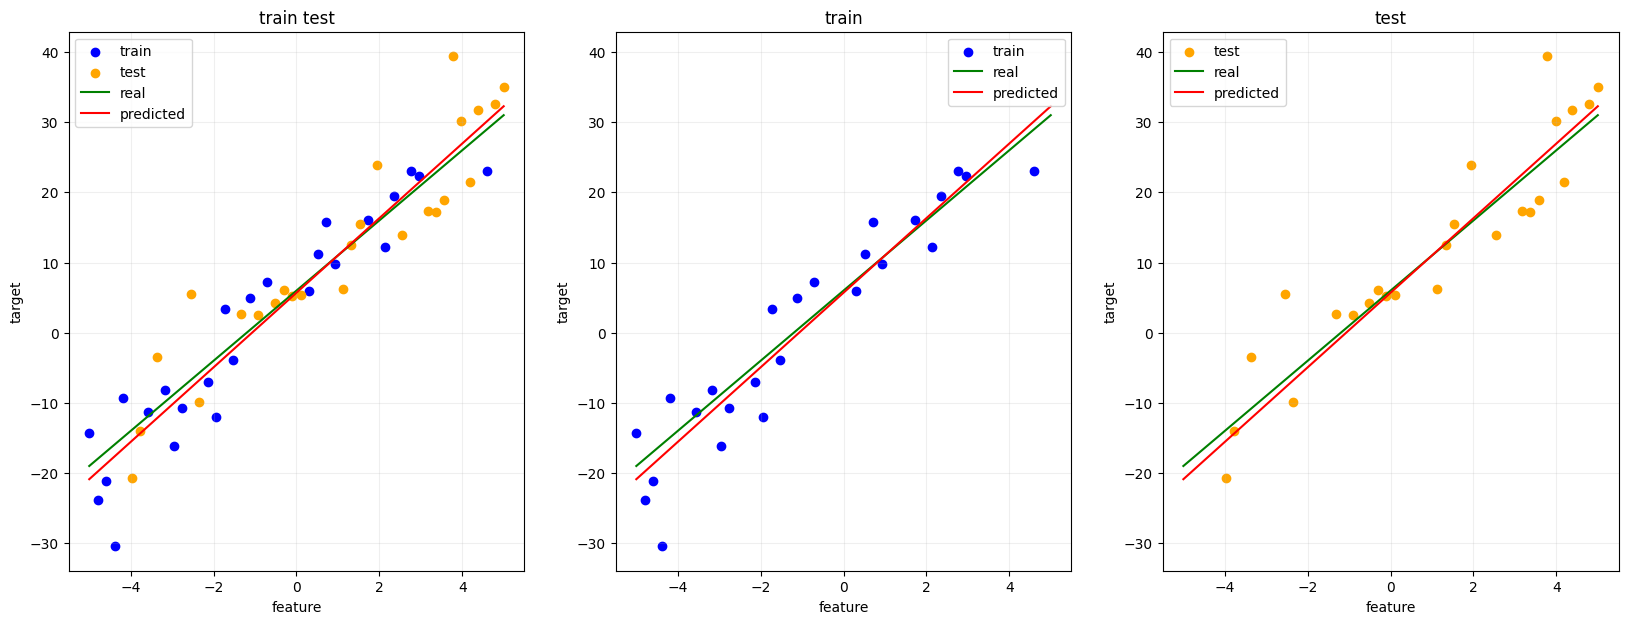

In [ ]:
plt.figure(figsize=(20, 7))

ax = None

for i, types in enumerate([['train', 'test'], ['train'], ['test']]):
    ax = plt.subplot(1, 3, i + 1, sharey=ax)
    if 'train' in types:
        plt.scatter(X_train, y_train, label='train', c='b')
    if 'test' in types:
        plt.scatter(X_test, y_test, label='test', c='orange')

    plt.plot(X, linear_expression(X), label='real', c='g')
    plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

    plt.ylabel('target')
    plt.xlabel('feature')
    plt.title(" ".join(types))
    plt.grid(alpha=0.2)
    plt.legend()

plt.show()

### 2.2 SGD

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø—Ä–µ–¥—ã–¥—É—â–∏–º –∑–∞–¥–∞–Ω–∏—è–º –Ω—É–∂–Ω–æ —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ $\displaystyle\frac{\partial{L}}{\partial{w}}$

**–ò–º–µ–µ–º:**
$$
\begin{aligned}L(w) &= ||Xw - Y||^2_2 + ||\Gamma w||^2_2
= (Xw - Y)^T(Xw - Y) + w^T\Gamma^T\Gamma w = \\
&= w^TX^TXw - 2Y^TXw + Y^TY + w^T\Gamma^T\Gamma w =
w^T(X^TX + \Gamma^T\Gamma)w - 2Y^TXw + Y^TY
\end{aligned}
$$

**–ì—Ä–∞–¥–∏–µ–Ω—Ç:**
$$
\frac{\partial{L}}{\partial{w}}
= 2(X^TX + \Gamma^T\Gamma)w - 2X^TY
$$

–ë—É–¥–µ–º —Ç–∞–∫–∂–µ —É—Å—Ä–µ–¥–Ω—è—Ç—å –∑–Ω–∞—á–µ–Ω–∏—è –ª–æ—Å—Å–∞ –ø–æ –±–∞—Ç—á—É –¥–∞–Ω–Ω—ã—Ö: –ø–æ—è–≤–∏—Ç—Å—è –º–Ω–æ–∂–∏—Ç–µ–ª—å $\displaystyle\frac{1}{n_{sample}}$

–†–µ–∞–ª–∏–∑—É–µ–º –Ω–∞—à –∫–ª–∞—Å—Å Ridge —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏—Å–ø–æ–ª—å–∑—É—è —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫


In [ ]:
class MySGDRidge(MySGDLinearRegression):
    def __init__(self, alpha=1.0, **kwargs):
        super().__init__(**kwargs) # –ø–µ—Ä–µ–¥–∞–µ—Ç –∏–º–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–æ–¥–∏—Ç–µ–ª—å—Å–∫–æ–º—É –∫–æ–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä—É
        self.w = None
        self.alpha = alpha

    def _calc_gradient(self, X, y, y_pred):
        # –ì–ª–∞–≤–Ω–æ–µ –æ—Ç–ª–∏—á–∏–µ –≤ SGD - —ç—Ç–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø–æ–¥–≤—ã–±–æ—Ä–∫–∏ –¥–ª—è —à–∞–≥–∞ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)

        lambdaE = self.alpha * np.eye(self.w.shape[0])
        if self.fit_intercept:
            lambdaE[-1, -1] = 0

        grad = 2 * (X[inds].T @ X[inds] / self.n_sample + lambdaE) @ self.w
        grad -= 2 * X[inds].T @ y[inds] / self.n_sample

        return grad

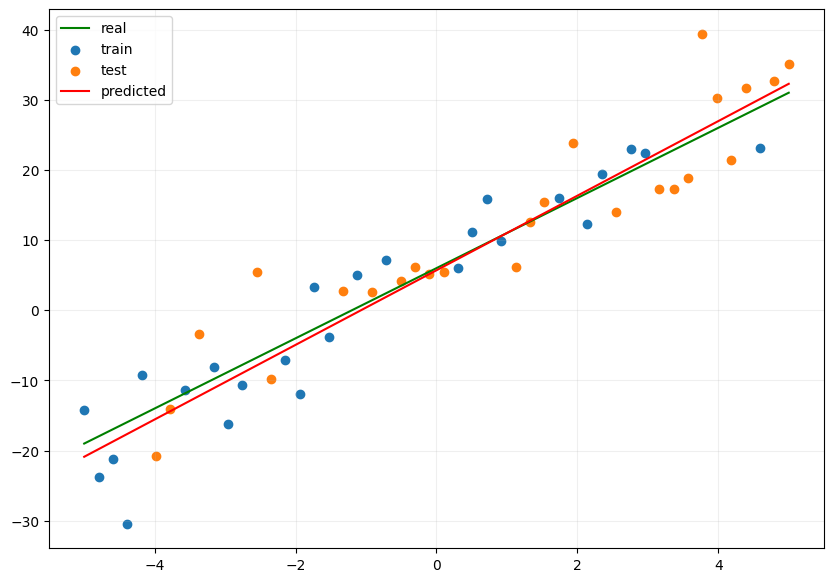

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

In [ ]:
regressor = MySGDRidge(alpha=1, n_sample=20).fit(X[:, np.newaxis], y, max_iter=1000, lr=0.01)
l = regressor.get_losses()
regressor.get_weights()

array([4.63198678, 6.12669022])

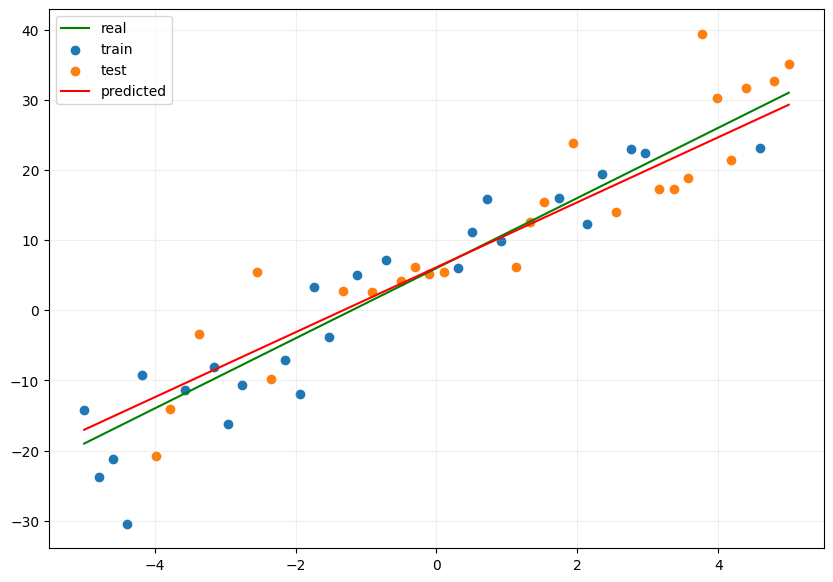

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

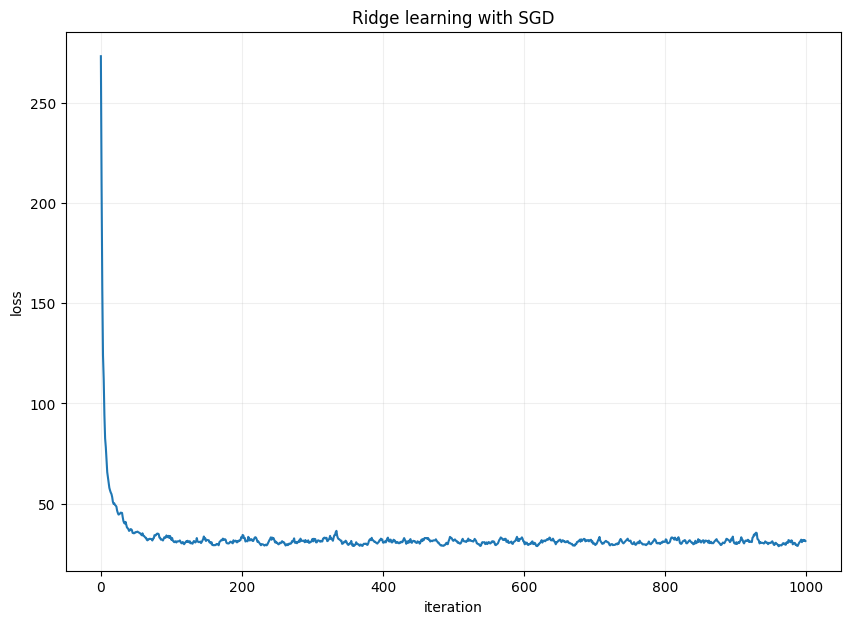

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(l)

plt.title('Ridge learning with SGD')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.grid(alpha=0.2)
plt.show()

# 3. LASSO-—Ä–µ–≥—Ä–µ—Å—Å–∏—è ($L_1$-—Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è)

–í LASSO –º—ã —à—Ç—Ä–∞—Ñ—É–µ–º –º–æ–¥–µ–ª—å —Ç–∞–∫–∂–µ **–Ω–∞ —Å—É–º–º—É –º–æ–¥—É–ª–µ–π –≤—Å–µ—Ö –µ–µ –≤–µ—Å–æ–≤** (–Ω–∞ $L_1$-–Ω–æ—Ä–º—É –≤–µ—Å–æ–≤), —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º:

**–õ–æ—Å—Å:** $L(w) = \frac{1}{2n} ||Xw - Y||^2_2 + \alpha ||w||_1$, –≥–¥–µ $\alpha$ - –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä, –æ—Ç–≤–µ—á–∞—é—â–∏–π –∑–∞ —Å—Ç–µ–ø–µ–Ω—å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏.

–í –ø—Ä–∏–≤—ã—á–Ω–æ–º –ø–æ–Ω–∏–º–∞–Ω–∏–∏:

**–õ–æ—Å—Å:** $L(w) = \frac{1}{2n}\sum_{i=1}^n\left(\sum_{j=1}^{m} x_{ij}w_j - y_i\right)^2 + \alpha\sum_{j=1}^{m}|w_j|$

–ü—Ä–∏–∑–Ω–∞–∫–∏ –æ–ø—è—Ç—å –∂–µ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–æ–≤–∞–Ω—ã –¥–ª—è –æ–¥–∏–Ω–∞–∫–æ–≤—ã—Ö —à—Ç—Ä–∞—Ñ–æ–≤ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –¥—Ä—É–≥ –¥—Ä—É–≥–∞!

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
reg = Lasso(alpha=1).fit(X[:, np.newaxis], y)
np.append(reg.coef_, reg.intercept_)

array([5.13078059, 6.11446782])

### 3.1 –ê–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ

–í –æ—Ç–ª–∏—á–∏–µ –æ—Ç Ridge, –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ Lasso-—Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –≤ –æ–±—â–µ–º —Å–ª—É—á–∞–µ –Ω–µ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è (–∫–∞–∫ –¥—É–º–∞–µ—Ç–µ, –ø–æ—á–µ–º—É?)

In [ ]:
# No analytic solution!

### 3.2 SGD

–ê–Ω–∞–ª–æ–≥–∏—á–Ω–æ –ø—Ä–µ–¥—ã–¥—É—â–∏–º –∑–∞–¥–∞–Ω–∏—è–º –¥–ª—è SGD –Ω—É–∂–Ω–æ —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ $\displaystyle\frac{\partial{L}}{\partial{w}}$

**–õ–æ—Å—Å:**
$$
\begin{aligned}L(w) &= \frac{1}{2n}||Xw - Y||^2_2 + ||\Gamma w||_1
= \frac{1}{2n}(Xw - Y)^T(Xw - Y) + ||\Gamma w||_1 = \\
&= \frac{1}{2n}(w^TX^TXw - 2Y^TXw + Y^TY) + \lambda\sum_{i=1}^{m-1}|w|
\end{aligned}
$$

**–ì—Ä–∞–¥–∏–µ–Ω—Ç:**
$$
\frac{\partial{L}}{\partial{w}}
= \frac{1}{n}(X^TXw - X^TY) + \lambda sign(w)
= \frac{1}{n}X^T(y_{pred} - Y) + \lambda sign(w)
$$

–≥–¥–µ –¥–ª—è –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å —á—Ç–æ $|\cdot|$ - –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º–∞—è —Ñ—É–Ω–∫—Ü–∏—è, –µ–µ –ø—Ä–æ–∏–∑–≤–æ–¥–Ω–æ–π —è–≤–ª—è–µ—Ç—Å—è $sign(\cdot)$. **(–ø–æ-—Ö–æ—Ä–æ—à–µ–º—É, —ç—Ç–æ —É–∂–µ –Ω–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫, –∞ —Å—É–±–≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π, —Ç–∞–∫ –∫–∞–∫ –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ—Ç –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ –Ω–µ–¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä—É–µ–º—É—é —Ñ—É–Ω–∫—Ü–∏—é)**

–†–µ–∞–ª–∏–∑—É–µ–º –Ω–∞—à –∫–ª–∞—Å—Å Lasso —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –∏—Å–ø–æ–ª—å–∑—É—è —Å—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã–π —Å–ø—É—Å–∫


In [ ]:
def soft_sign(x, eps=1e-7):
    if abs(x) > eps:
        return np.sign(x)
    return x / eps

np_soft_sign = np.vectorize(soft_sign)

class MySGDLasso(MySGDLinearRegression):
    def __init__(self, alpha=1.0, **kwargs):
        super().__init__(**kwargs) # –ø–µ—Ä–µ–¥–∞–µ—Ç –∏–º–µ–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–æ–¥–∏—Ç–µ–ª—å—Å–∫–æ–º—É –∫–æ–Ω—Å—Ç—Ä—É–∫—Ç–æ—Ä—É
        self.w = None
        self.alpha = alpha

    def _calc_gradient(self, X, y, y_pred):
        # –ì–ª–∞–≤–Ω–æ–µ –æ—Ç–ª–∏—á–∏–µ –≤ SGD - —ç—Ç–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ –ø–æ–¥–≤—ã–±–æ—Ä–∫–∏ –¥–ª—è —à–∞–≥–∞ –æ–ø—Ç–∏–º–∏–∑–∞—Ü–∏–∏
        inds = np.random.choice(np.arange(X.shape[0]), size=self.n_sample, replace=False)

        signw = np_soft_sign(self.w)
        if self.fit_intercept:
            signw[-1] = 0

        grad = X[inds].T @ (y_pred[inds] - y[inds])[:, np.newaxis] / self.n_sample
        grad += self.alpha * signw[:, np.newaxis]

        return grad.flatten()

–ü—Ä–æ—Ç–µ—Å—Ç–∏—Ä—É–µ–º

In [ ]:
regressor = MySGDLasso(alpha=1, n_sample=4).fit(X[:, np.newaxis], y, max_iter=1000, lr=0.01)
l = regressor.get_losses()
regressor.get_weights()

array([5.18279658, 5.96392023])

In [ ]:
sklearn_reg = Lasso().fit(X[:, np.newaxis], y)
np.append(sklearn_reg.coef_, sklearn_reg.intercept_)

array([5.13078059, 6.11446782])

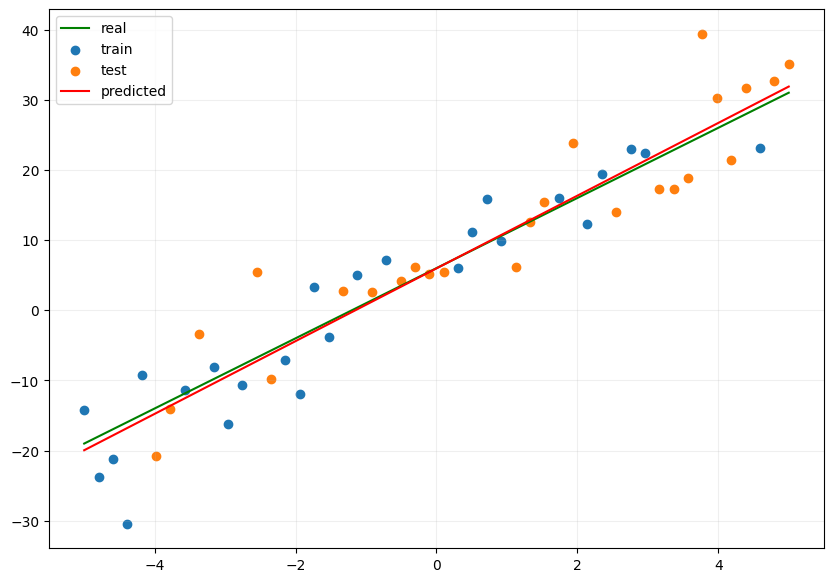

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real', c='g')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, regressor.predict(X[:, np.newaxis]), label='predicted', c='r')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

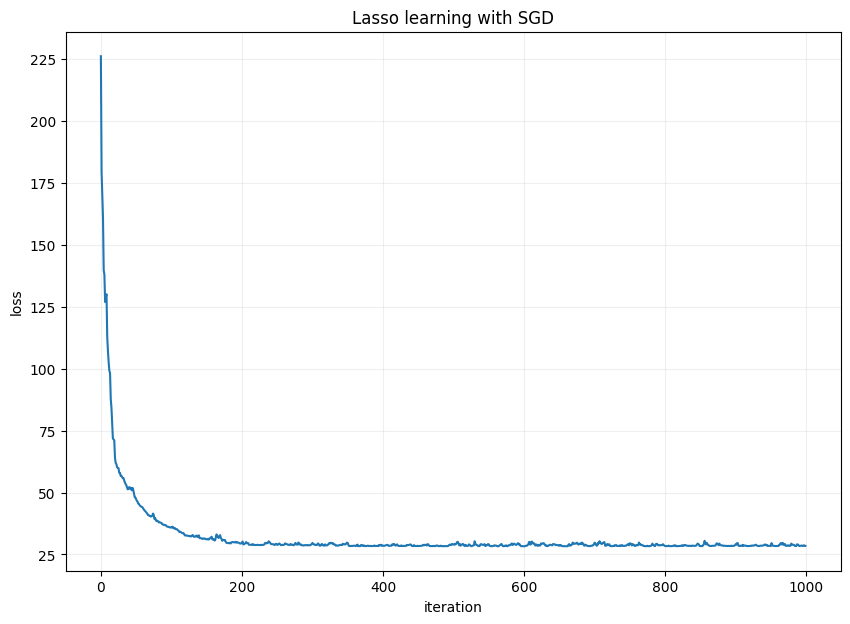

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(l)

plt.title('Lasso learning with SGD')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.grid(alpha=0.2)
plt.show()

# 4. –†–∞–∑–ª–∏—á–∏—è LASSO –∏ Ridge

*–û—Ç–∫—É–¥–∞ —ç—Ç–∏ –∫—Ä—É–∂–æ—á–∫–∏ –û_–æ*

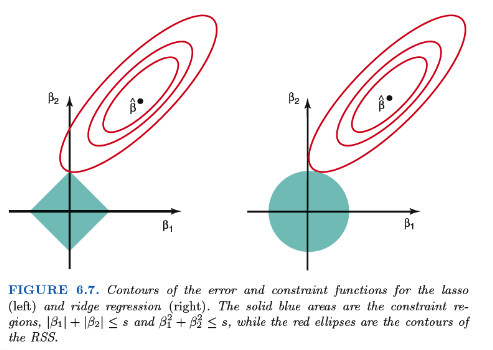

–†–∞–∑–ª–∏—á–∏—è $L_1$ –∏ $L_2$ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–π:

#### $L_1$ (Lasso):

* Lasso –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –æ—Ç–±–∏—Ä–∞–µ—Ç –Ω–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∑–∞–Ω—É–ª—è—è –≤–µ—Å–∞ –¥–ª—è –º–µ–Ω–µ–µ –≤–∞–∂–Ω—ã—Ö;
* –ù–µ –∏–º–µ–µ—Ç –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è, —Ç—Ä–µ–±—É–µ—Ç –∏—Ç–µ—Ä–∞—Ç–∏–≤–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–≤;
* –•–æ—Ä–æ—à–æ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏, –Ω–æ –º–æ–∂–µ—Ç —Å–ª—É—á–∞–π–Ω–æ –≤—ã–±—Ä–∞—Ç—å –æ–¥–∏–Ω –∏–∑ –∫–æ—Ä—Ä–µ–ª–∏—Ä—É—é—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

#### $L_2$ (Ridge):

* –°–∂–∏–º–∞–µ—Ç –≤–µ—Å–∞, –Ω–æ –Ω–µ –∑–∞–Ω—É–ª—è–µ—Ç –∏—Ö –ø–æ–ª–Ω–æ—Å—Ç—å—é, –ø–æ—ç—Ç–æ–º—É –Ω–µ –æ—Ç–±–∏—Ä–∞–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫–∏;
* –£–ª—É—á—à–∞–µ—Ç —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ –∫ —à—É–º—É –∏ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é, –æ—Å–æ–±–µ–Ω–Ω–æ –∫–æ–≥–¥–∞ –≤ –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å –∫–æ–ª–ª–∏–Ω–µ–∞—Ä–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏;
* –ò–º–µ–µ—Ç –∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ, —á—Ç–æ —É–ø—Ä–æ—â–∞–µ—Ç –≤—ã—á–∏—Å–ª–µ–Ω–∏—è.


### $L_{0.5}$ (???) –≠—Ç–æ —á—Ç–æ, —à—É—Ç–∫–∞?

**–ù–µ —à—É—Ç–∫–∞**, —É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–µ –æ—Å—Ç–∞—ë—Ç—Å—è —à–∞–Ω—Å–æ–≤: –∏—Ö –ø–æ—á—Ç–∏ —Ç–æ—á–Ω–æ –∑–∞–Ω—É–ª—è—Çüòà

$L_{0.5}$, $L_{1}$, $L_{2}$ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ

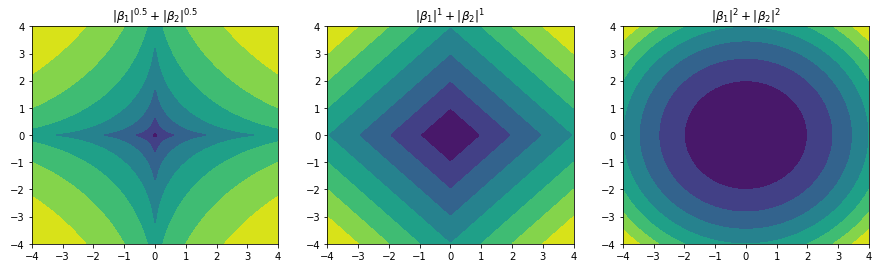

# 5. ElasticNet (L1+L2)

**–õ–æ—Å—Å:** $L(w) = \frac{1}{2n}||Xw - Y||^2_2 + \alpha r ||w||_1 + 0.5 * \alpha * (1 - r) ||w||^2_2$, –≥–¥–µ $\alpha, r = {l1\_ratio}$ - –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –æ—Ç–≤–µ—á–∞—é—â–∏–µ –∑–∞ —Å—Ç–µ–ø–µ–Ω—å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏.

* –û–±—ä–µ–¥–∏–Ω—è–µ—Ç –ø—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞ –æ–±–µ–∏—Ö —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–π: –æ—Ç–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ—Ç L1 –∏ —É—Å—Ç–æ–π—á–∏–≤–æ—Å—Ç—å –æ—Ç L2.
* –ü–æ–∑–≤–æ–ª—è–µ—Ç –≥–∏–±–∫–æ –Ω–∞—Å—Ç—Ä–∞–∏–≤–∞—Ç—å –±–∞–ª–∞–Ω—Å –º–µ–∂–¥—É L1 –∏ L2 —Å –ø–æ–º–æ—â—å—é –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ alpha –∏ l1_ratio.

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
reg = ElasticNet(alpha=0.5, l1_ratio=0.5).fit(X[:, np.newaxis], y)
np.append(reg.coef_, reg.intercept_)

array([5.07108462, 6.11446782])

–í–∏–∑—É–∞–ª—å–Ω–æ —Å—Ä–∞–≤–Ω–∏–º —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression().fit(X[:, np.newaxis], y)
ereg = ElasticNet(alpha=0.5, l1_ratio=0.5).fit(X[:, np.newaxis], y)
rreg = Ridge(alpha=1).fit(X[:, np.newaxis], y)
lreg = Lasso(alpha=1).fit(X[:, np.newaxis], y)

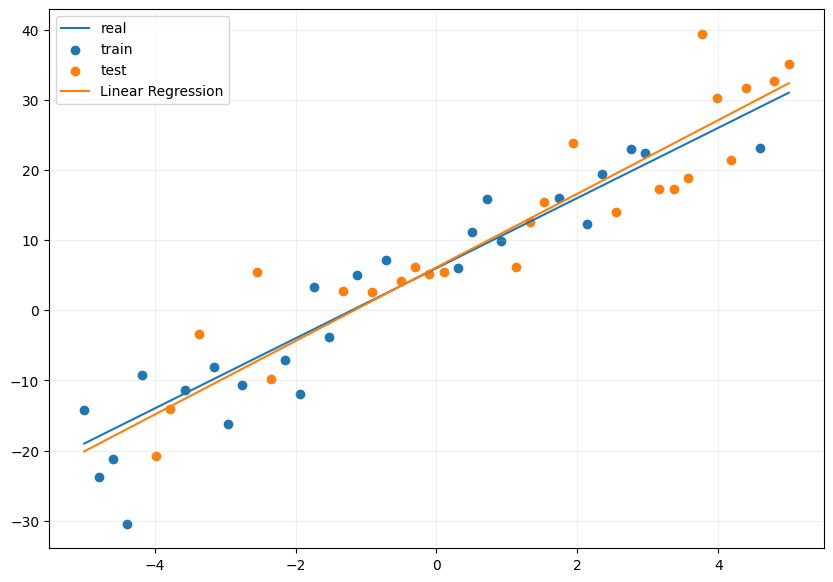

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, reg.predict(X[:, np.newaxis]), label='Linear Regression')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

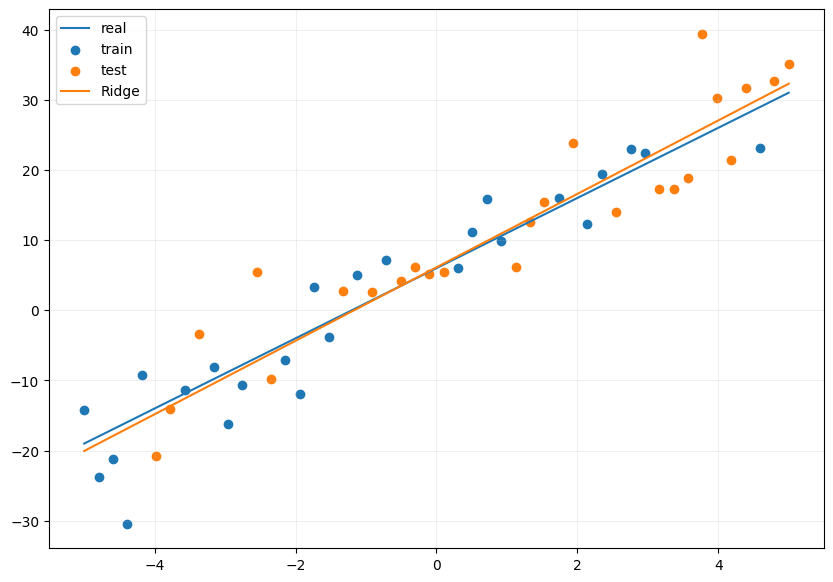

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, rreg.predict(X[:, np.newaxis]), label='Ridge')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

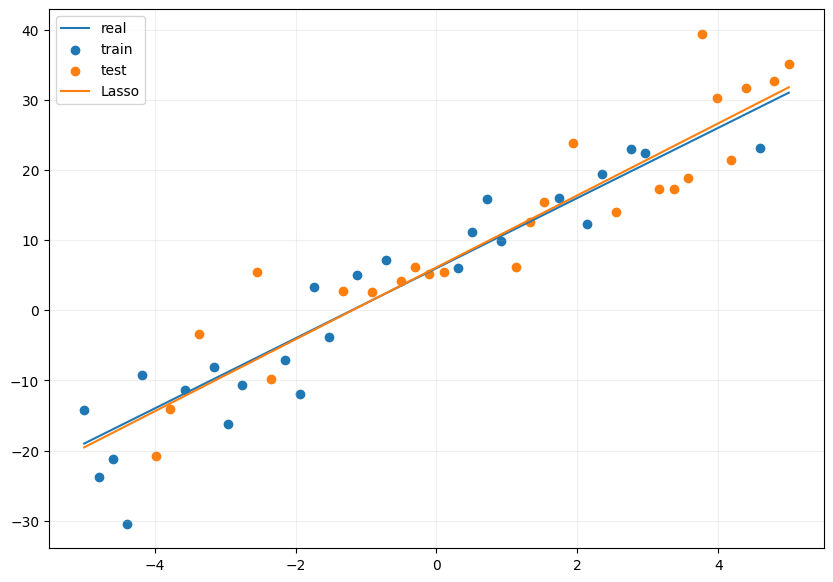

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, lreg.predict(X[:, np.newaxis]), label='Lasso')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

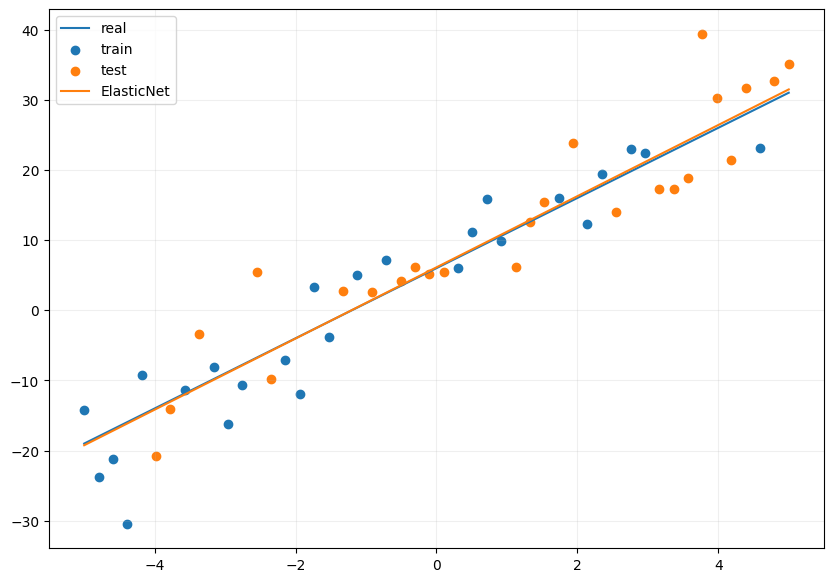

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(X, linear_expression(X), label='real')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, ereg.predict(X[:, np.newaxis]), label='ElasticNet')

plt.grid(alpha=0.2)
plt.legend()
plt.show()

# –ö–æ–Ω—Å—Ç–µ—Å—Ç ‚Ññ1: –õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è.

1. –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö:
  * –ó–∞–≥—Ä—É–∑–∫–∞ –∏ –æ—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö (–æ–±—Ä–∞–±–æ—Ç–∫–∞ –≤—ã–±—Ä–æ—Å–æ–≤, –¥—É–±–ª–∏–∫–∞—Ç–æ–≤).
  * –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: –≤—ã—è–≤–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤, –∞–Ω–∞–ª–∏–∑ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏.
  * –û–±—Ä–∞–±–æ—Ç–∫–∞ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π: –∑–∞–ø–æ–ª–Ω–µ–Ω–∏–µ —Å—Ä–µ–¥–Ω–∏–º, –º–µ–¥–∏–∞–Ω–æ–π, –º–æ–¥–æ–π, *–º–µ—Ç–æ–¥–æ–º $k$-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π*\*.
  * –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: one-hot encoding, label encoding.
  * –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: —Å—Ç–∞–Ω–¥–∞—Ä—Ç–∏–∑–∞—Ü–∏—è ($z$-score), min-max scaling.
  * –í—ã–±–æ—Ä –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: –∞–Ω–∞–ª–∏–∑ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏, *–∞–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤*\*, *–º–µ—Ç–æ–¥ –≥–ª–∞–≤–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç (PCA)*\*.
2. –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö:
  * –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â—É—é, —Ç–µ—Å—Ç–æ–≤—É—é –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫–∏.
3. –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:
  * –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏: –±–µ–π–∑–ª–∞–π–Ω (*–º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ø—Ä–∏–º–µ–Ω–∏—Ç—å —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ—Ä—É—á–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞–Ω–Ω—É—é –≤–µ—Ä—Å–∏—é —Ä–µ–≥—Ä–µ—Å—Å–∏–∏*\*)
  * –†–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏—è: $L_1$ (Lasso), $L_2$ (Ridge), ElasticNet (Lasso + Ridge) –¥–ª—è –ø—Ä–µ–¥–æ—Ç–≤—Ä–∞—â–µ–Ω–∏—è –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—è.
  * –í—ã–±–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–π –º–æ–¥–µ–ª–∏: —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ –æ–±—ã–∫–Ω–æ–≤–µ–Ω–Ω–æ–≥–æ –ú–ù–ö –∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–π —Å —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–µ–π.
  * –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤: –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è, *–ø–æ–∏—Å–∫ –ø–æ —Å–µ—Ç–∫–µ*\*...
4. –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏:
  * –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫: MSE, RMSE, MAE, ${R^2}$**\***.
  * –ê–Ω–∞–ª–∏–∑ –æ—à–∏–±–æ–∫.
5. –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –Ω–∞—Å—Ç—Ä–æ–π–∫–∏*\:
  * –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –Ω–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤\*, –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏–µ –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏\*.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

In [ ]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [ ]:
pipeline = make_pipeline(StandardScaler(), LinearRegression())

In [ ]:
pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred = pipeline.predict(X)
y_pred[:10]

array([206.11667725,  68.07103297, 176.88279035, 166.91445843,
       128.46225834, 106.35191443,  73.89134662, 118.85423042,
       158.80889721, 213.58462442])

#### **–ü–æ–ª–µ–∑–Ω—ã–µ —Å—Å—ã–ª–∫–∏ –ø–æ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º:**

* [–ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ - GridSearchCV](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.GridSearchCV.html)
* [–ü–æ–¥–±–æ—Ä –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ - RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
* [–û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ - Optuna](https://optuna.org/)